# Predicitve ML Project

* Author: Kim Melso
* [GitHub Repository](https://github.com/kander643/datafun-07-ml)

In [31]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Part 1: Chart a Straight Line

In [2]:
# Create Celsius values
celsius = np.arange(-20, 101, 5)

# Convert to Fahrenheit using y = mx + b
# m = 9/5
# b = 32
fahrenheit = (9 / 5) * celsius + 32

# Create DataFrame
temps_df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})

temps_df.head()

,Celsius,Fahrenheit
0,-20,-4.0
1,-15,5.0
2,-10,14.0
3,-5,23.0
4,0,32.0


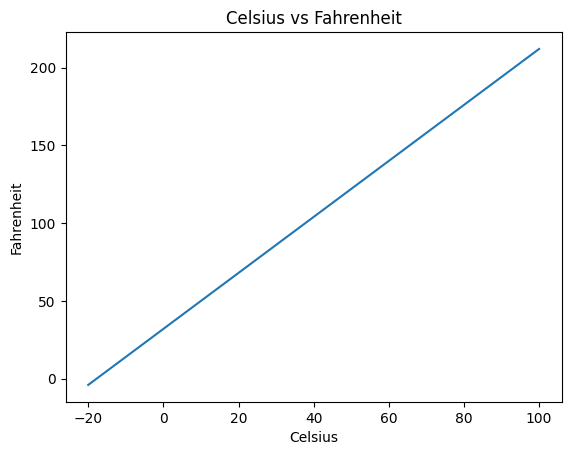

In [3]:
temps_df.plot(x='Celsius', y='Fahrenheit', title='Celsius vs Fahrenheit', legend=False)
plt.ylabel('Fahrenheit')
plt.show()

## Part 2: Prediction

### Section 1: Data Acquisition

In [35]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2: Data Inspection

In [ ]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Data Cleaning

In [43]:
nyc_df = nyc_df.iloc[:, :2]
nyc_df.columns = ['Date', 'Temperature']

# Extract just the year
nyc_df['Year'] = nyc_df['Date'].astype(str).str[:4].astype(int)

nyc_df.head()

,Date,Temperature,Year
0,189501,34.2,1895
1,189601,34.7,1896
2,189701,35.5,1897
3,189801,39.6,1898
4,189901,36.4,1899


### Section 4: Descriptive Statistics

In [38]:
pd.set_option('display.precision', 2)

nyc_df.describe()

,Date,Temperature,Anomaly,Year
count,124.00,124.00,124.00,124.00
mean,195651.00,37.60,0.20,195651.00
std,3593.98,4.54,4.54,3593.98
min,189501.00,26.10,-11.30,189501.00
25%,192576.00,34.58,-2.82,192576.00
50%,195651.00,37.60,0.20,195651.00
75%,198726.00,40.60,3.20,198726.00
max,201801.00,47.60,10.20,201801.00


### Section 5: Build the Model

In [55]:
linear_regression = stats.linregress(nyc_df['Year'], nyc_df['Temperature'])

linear_regression

LinregressResult(slope=np.float64(0.014771361132966163), intercept=np.float64(8.694993233674289), rvalue=np.float64(0.1169376670075292), pvalue=np.float64(0.19586679787456185), stderr=np.float64(0.011357855112603288), intercept_stderr=np.float64(22.22536216679513))

In [56]:
slope = linear_regression.slope
intercept = linear_regression.intercept

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

Slope (m): 0.014771361132966163
Intercept (b): 8.694993233674289


### Section 6: Predict 

In [57]:
prediction_2024 = slope * 2024 + intercept

print(f"Predicted Avg High Temp in Jan 2024: {prediction_2024:.2f}")

Predicted Avg High Temp in Jan 2024: 38.59


### Section 7: Visualizations

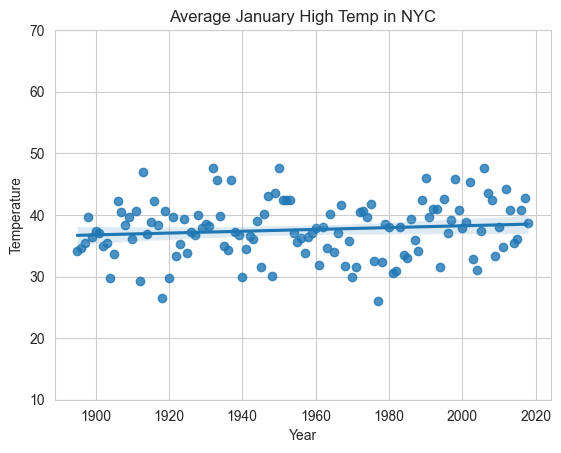

In [58]:
sns.set_style('whitegrid')

sns.regplot(x='Year', y='Temperature', data=nyc_df)

plt.ylim(10, 70)
plt.title('Average January High Temp in NYC')
plt.show()

## Part 3: Prediction

### Section 1: Build the Model

In [59]:
X = nyc_df[['Year']]
y = nyc_df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

print(X_train.shape)
print(X_test.shape)

(93, 1)
(31, 1)


In [60]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [61]:
m = linear_regression_model.coef_[0]
b = linear_regression_model.intercept_

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 0.019391673294782773
Intercept (b): -0.30779820252656975


### Section 2: Test the Model

In [62]:
predicted = linear_regression_model.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': predicted}).head()

,Actual,Predicted
73,31.7,37.86
2,35.5,36.48
77,40.5,37.93
9,29.8,36.61
16,40.7,36.75


### Section 3: Predict

In [63]:
prediction_2024 = linear_regression_model.predict(pd.DataFrame({'Year': [2024]}))

print(f"Predicted Avg High Temp in Jan 2024: {prediction_2024[0]:.2f}")

Predicted Avg High Temp in Jan 2024: 38.94


### Section 4: Visualization

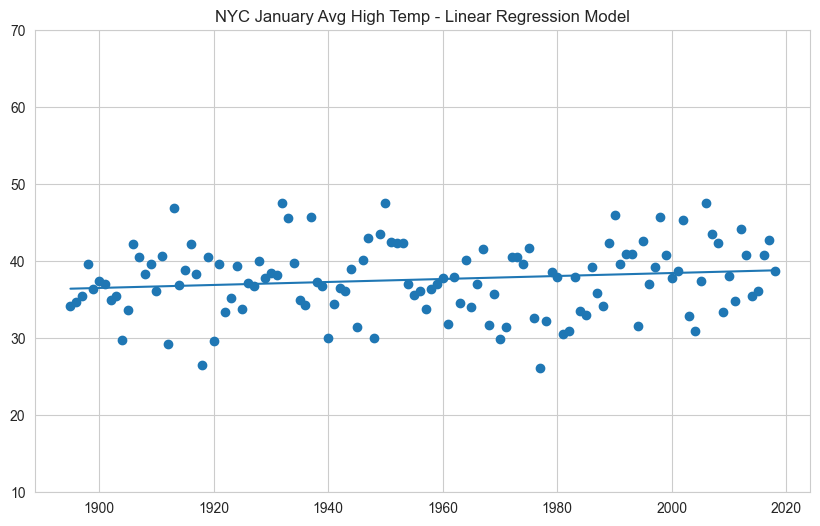

In [64]:
nyc_df = nyc_df.sort_values('Year')

predicted_line = linear_regression_model.predict(nyc_df[['Year']])

plt.figure(figsize=(10, 6))

plt.scatter(nyc_df['Year'], nyc_df['Temperature'])
plt.plot(nyc_df['Year'], predicted_line)

plt.ylim(10, 70)
plt.title('NYC January Avg High Temp - Linear Regression Model')
plt.show()